# Analysis of the weatherStation data
In this notebook we use some basic time series tools to analyze a dataset of temperatures and humidity from the Otaniemi area. The measurements are taken from a timeperiod of X days (21.11.2018 - X), where a measurement is taken once per hour. 

This project is part my full stack data analysis project. More information can be found from Github:

https://github.com/JoonasMaanonen/weatherStation

## Original Timeseries
Let's first plot the original timeseries and analyze that. 

The temperature time series has a slight downwards trend and the humidity time series has slight upwards trend. This indicates that temperature and humidity are negatively correlated. 

The plots also indicate that there might be some deterministic seasonality with some period length. A logical assumption would be that the period length is 24 hours, since we are talking about weather measurements.

Data: 
               Date             Sensor  Temperature(C)  Humidity(%)
0  2018-11-21 12:23   Otaniemi (SMT12)             0.6         84.8
1  2018-11-21 13:23   Otaniemi (SMT12)             0.5         84.5
2  2018-11-21 14:23   Otaniemi (SMT12)             0.7         84.9
3  2018-11-21 15:23   Otaniemi (SMT12)             0.7         83.6
4  2018-11-21 16:23   Otaniemi (SMT12)             0.0         86.9


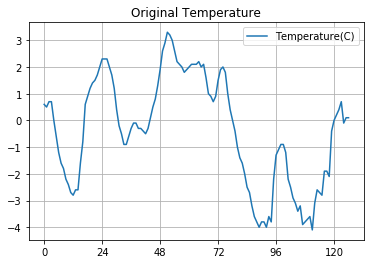

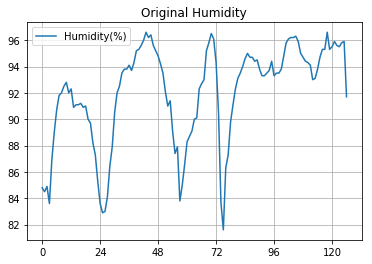

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("udpServer/server/measurements.csv")
print("Data: ")
print(data.head())

temp_series = data[["Date", "Temperature(C)"]]
hum_series = data[["Date", "Humidity(%)"]]

temp_series.plot(title="Original Temperature")
_ = plt.xticks(np.arange(0, 122, 24))
plt.grid(True)

hum_series.plot(title="Original Humidity")
_ = plt.xticks(np.arange(0, 122, 24))
plt.grid(True)

## Differencing
Differencing is a technique that can be used to remove trends or seasonal components from a time series.

The difference operator is defined as:

$$ Dx_t = x_t - x_{t-1} $$

This operator can be used to remove a linear trend from the data.


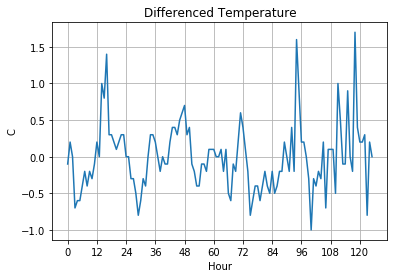

We can see that the slight downwards trend is gone now.


In [10]:
# Computes that difference
def difference(data, lag=1):
    diffed_data = []
    for i in range(lag, len(data)):
        value = data[i] - data[i - lag]
        diffed_data.append(value)
    return diffed_data

# Extract the raw data
data_values = data.values
temp = data_values[:, 2]
hum = data_values[:, 3]
dates = data_values[:,0]

# Normal Differencing
plt.figure(1)
diff_temp = difference(temp)
plt.plot(diff_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Differenced Temperature")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()

print("We can see that the slight downwards trend is gone now.")


In [ ]:
plt.figure(3)
# D24
diff24_temp = difference(temp, lag=24)
plt.plot(diff24_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Seasonal Diff with period length 24")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()

plt.figure(4)
final_diff_temp = difference(diff24_temp, lag=1)
plt.plot(final_diff_temp)
_ = plt.xticks(np.arange(0, 122, 12))
plt.grid(True)
plt.title("Differencing and Seasonality differencing")
plt.ylabel("C")
plt.xlabel("Hour")
plt.show()